In [1]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt

In [55]:
df = pd.read_excel("Inventory Dataset.xlsx")

In [56]:
df.head()

,device_container_name,Inventory,Date
0,Chromecast,34.387960,2017-10-18
1,iOS tablet web,1244.336982,2017-10-22
2,Chromecast,15.792440,2017-10-21
3,Android tablet web,880.090863,2017-10-09
4,Chromecast,6.716064,2017-10-16


In [57]:
df["Date"] = df["Date"].sort_values()

In [58]:
df.sort_values('Date').tail()

,device_container_name,Inventory,Date
202,Chromecast,1.767943e+00,2017-10-24
13,Desktop,6.583840e+06,2017-10-24
91,Android tablet web,8.658674e+03,2017-10-24
272,All devices,6.406213e+02,2017-10-24
34,Android native apps,7.239769e+07,2017-10-24


In [59]:
df.device_container_name.value_counts()

All devices            30
iOS mobile web         30
iOS native apps        30
Chromecast             30
Android tablet web     30
Android mobile web     30
Android native apps    30
iOS tablet web         30
Desktop                30
Smart TV (Videocon)     9
Android TV              4
Name: device_container_name, dtype: int64

In [60]:
timeseires = df[["Date","Inventory"]]

In [61]:
timeseires.isnull().sum()

Date         0
Inventory    0
dtype: int64

In [62]:
values = timeseires.groupby(timeseires['Date']).mean()

In [63]:
values.head()

,Inventory
Date,
2017-09-25,5.710480e+05
2017-09-26,2.893896e+06
2017-09-27,6.241513e+05
2017-09-28,1.587546e+06
2017-09-29,2.997467e+05


In [64]:
values.index

DatetimeIndex(['2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-09-30', '2017-10-01', '2017-10-02',
               '2017-10-03', '2017-10-04', '2017-10-05', '2017-10-06',
               '2017-10-07', '2017-10-08', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-14',
               '2017-10-15', '2017-10-16', '2017-10-17', '2017-10-18',
               '2017-10-19', '2017-10-20', '2017-10-21', '2017-10-22',
               '2017-10-23', '2017-10-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [73]:
values.columns


Index(['Inventory'], dtype='object')

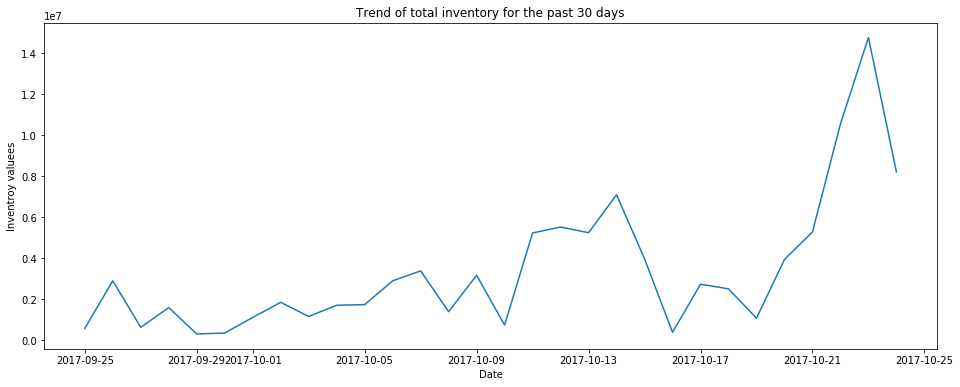

In [123]:
plt.figure(figsize=(16,6))
plt.title('Trend of total inventory for the past 30 days')
plt.xlabel('Date')
plt.ylabel('Inventroy valuees')
plt.plot(values.index,values)


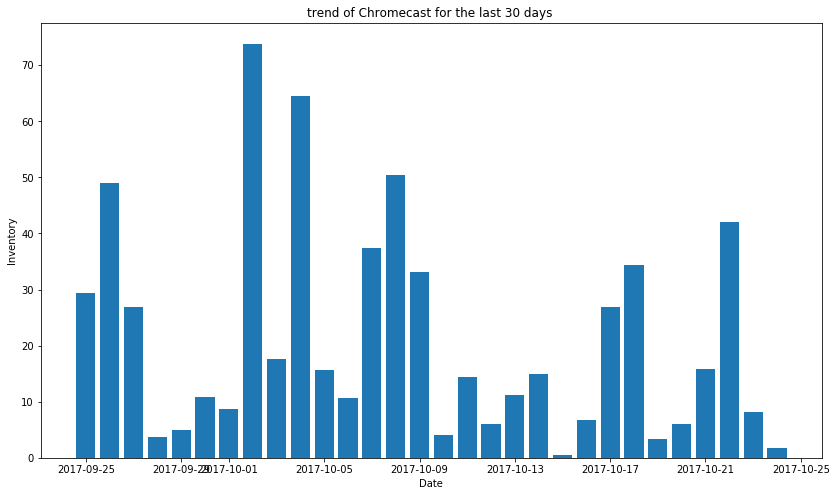

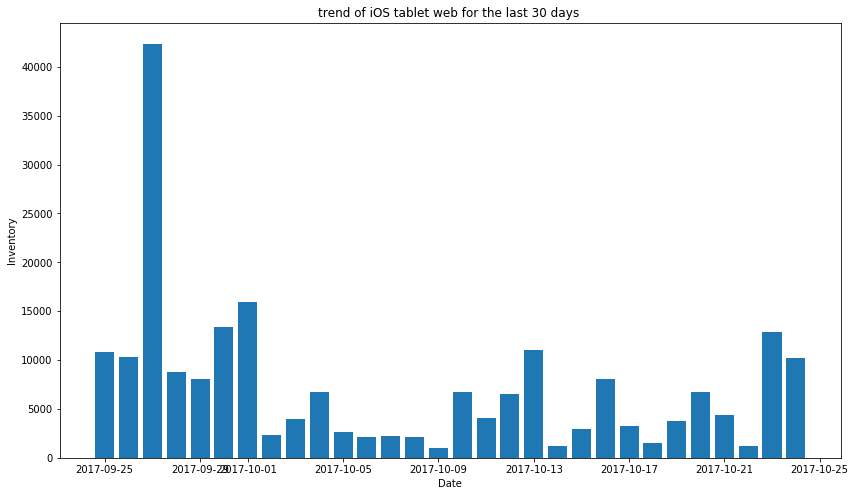

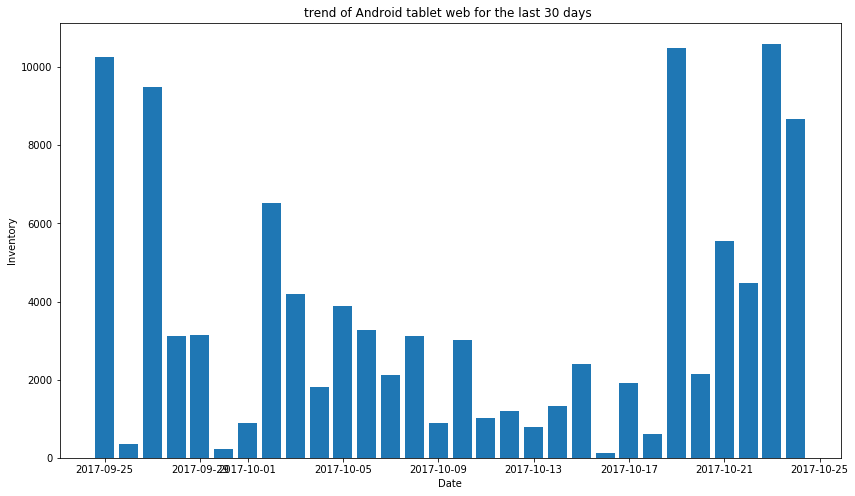

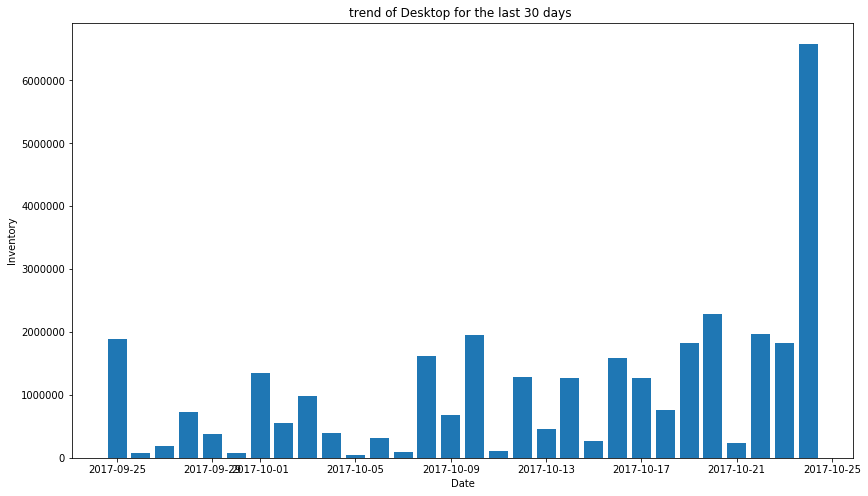

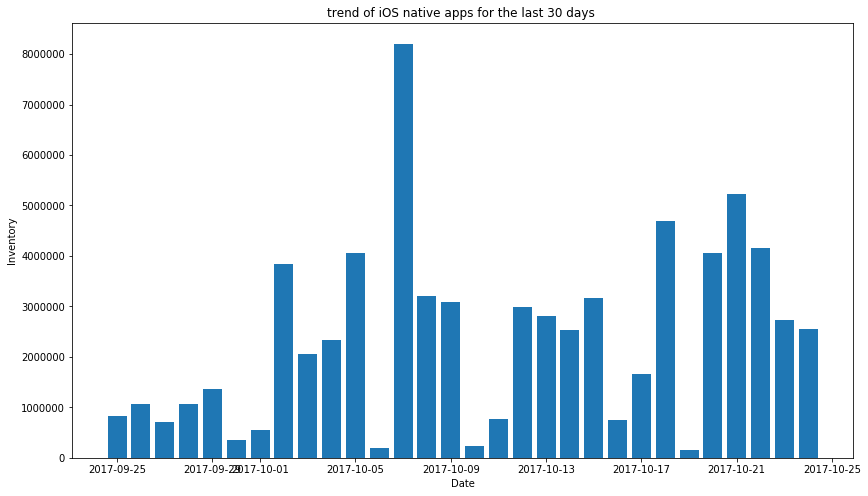

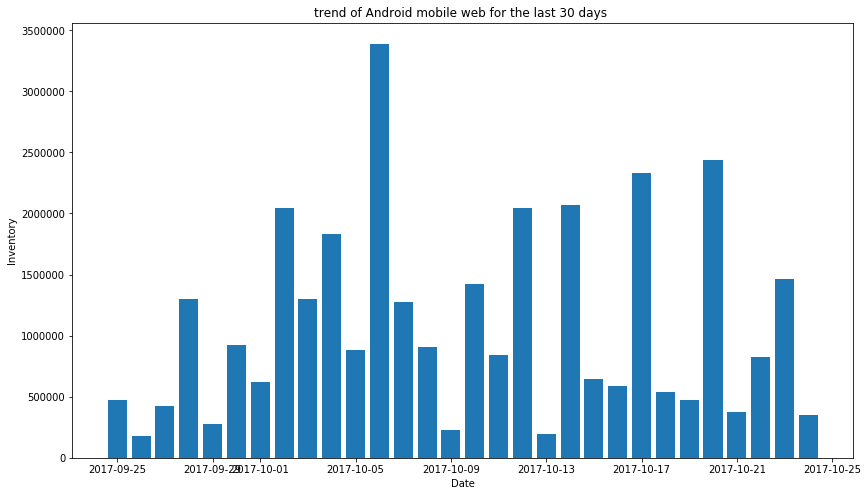

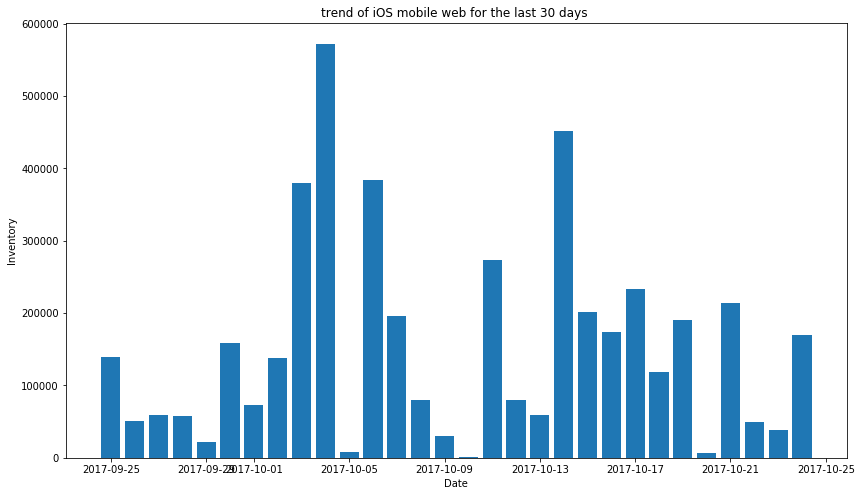

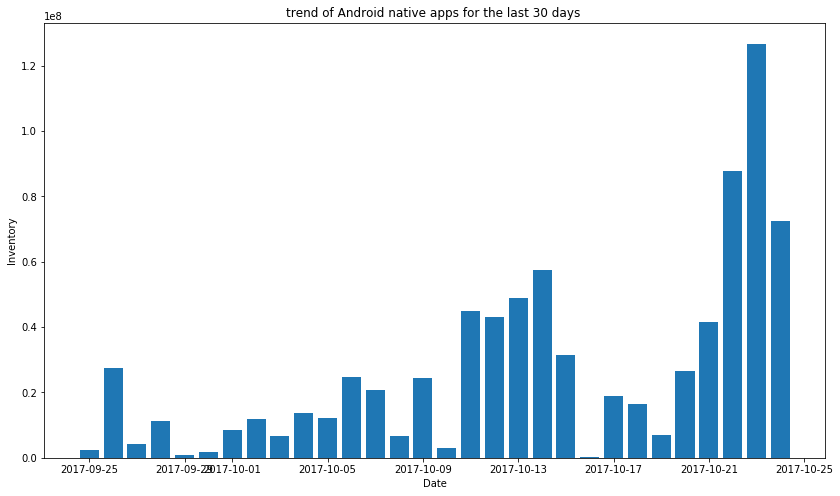

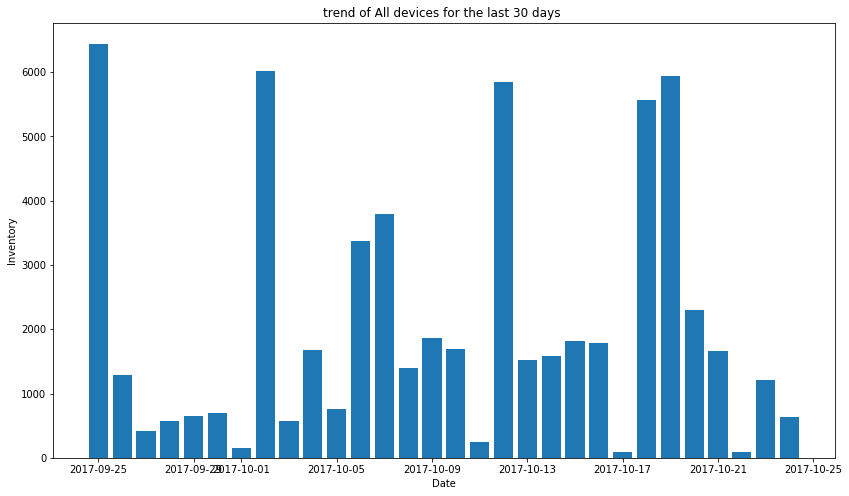

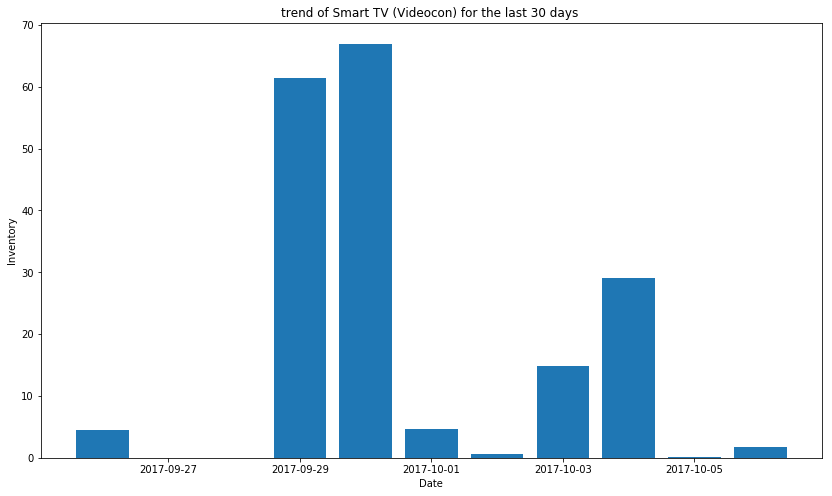

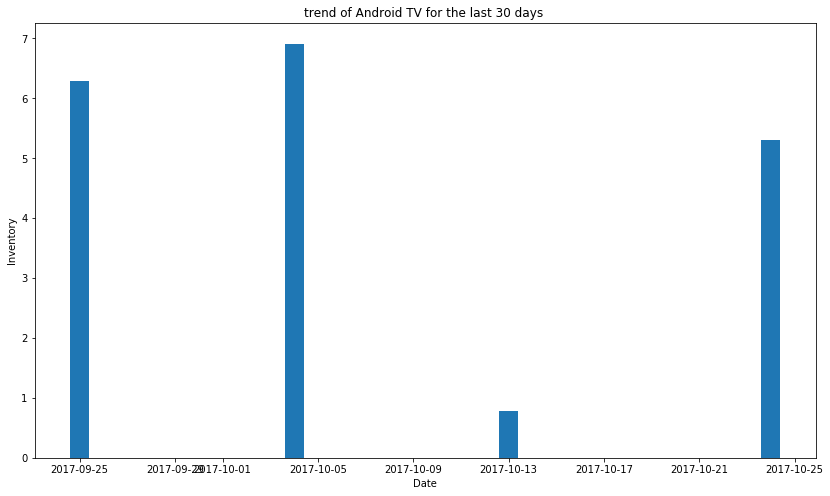

In [125]:
Names = df['device_container_name'].unique()
for i in Names:
    device = df[df['device_container_name']==i]
    device = device.set_index('Date')
    device = device.sort_index()
#     print(device.head())
#     print(device[i])
    plt.figure(figsize=(14,8))
    plt.bar(device.index,device['Inventory'])
    plt.xlabel('Date')
    plt.ylabel('Inventory')
    plt.title('trend of ' + i + ' for the last 30 days ')
    plt.show()

# Change in Inventory

In [197]:
Oct24 = df[df['Date']=='2017-10-24']

In [198]:
Oct24

,device_container_name,Inventory,Date
7,iOS native apps,2.544530e+06,2017-10-24
8,Android mobile web,3.471082e+05,2017-10-24
13,Desktop,6.583840e+06,2017-10-24
23,iOS tablet web,1.020427e+04,2017-10-24
34,Android native apps,7.239769e+07,2017-10-24
91,Android tablet web,8.658674e+03,2017-10-24
132,Android TV,5.304325e+00,2017-10-24
186,iOS mobile web,1.700689e+05,2017-10-24
202,Chromecast,1.767943e+00,2017-10-24
272,All devices,6.406213e+02,2017-10-24


In [106]:
b = values[values.index == '2017-10-24']

In [107]:
a = values[values.index == '2017-10-23']

In [114]:
def percentage(a,b):
    perc = 100*(float(b)-float(a))/float(b)
#     print(perc)
    return perc

# Percentage change for Oct24 vs Oct 23

In [115]:
percentage(a.values,b.values)

-79.8995954268023

# Percentage change for Oct24 vs Previous 7 days

In [116]:
sevendays  = values[-7:-1].sum()

In [117]:
percentage(sevendays.sum(),b.values)

-364.0943255361476

# Percentage change for Oct24 vs last 30 days

In [122]:
percentage(values[:-1].sum(),b.values)

-1041.1692220066905